# MODELO DE REGRESION LINEAL

Forma del conjunto de datos: (301, 9)

Información de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

Valores faltantes:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Estadísticas descriptivas:
              Year  Selling_Price  Present_Pric

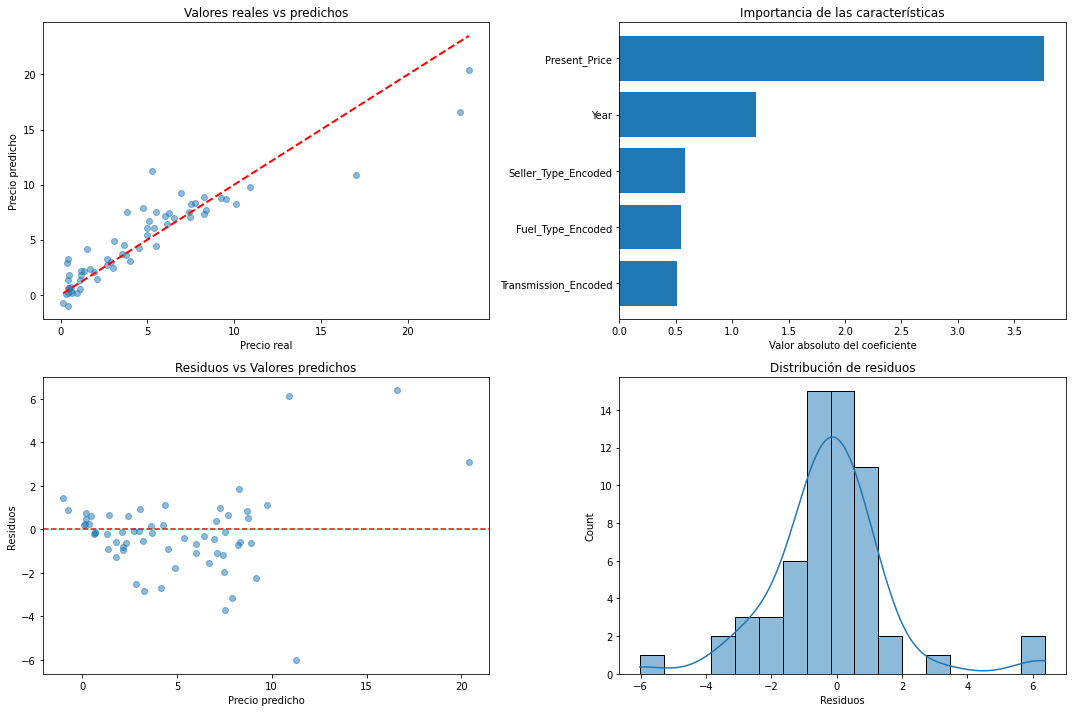

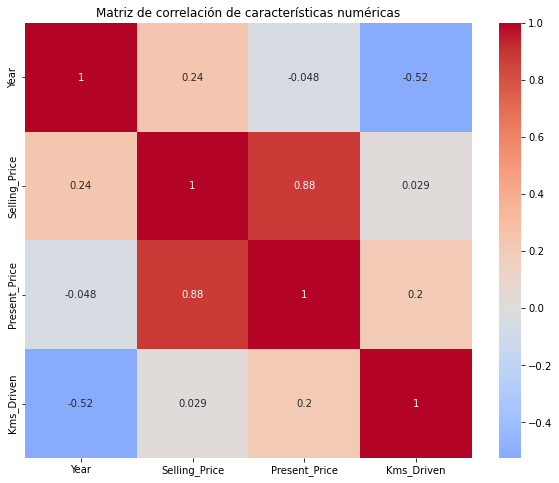


Coeficientes de características:
Year: 1.2122
Present_Price: 3.7687
Fuel_Type_Encoded: -0.5448
Seller_Type_Encoded: -0.5801
Transmission_Encoded: -0.5090


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# 1. Cargar y explorar los datos
df = pd.read_csv('car data.csv')

# Exploración inicial
print("Forma del conjunto de datos:", df.shape)
print("\nInformación de los datos:")
print(df.info())
print("\nValores faltantes:")
print(df.isnull().sum())
print("\nEstadísticas descriptivas:")
print(df.describe())

# 2. Preprocesamiento de datos
# Convertir variables categóricas usando Label Encoding
le = LabelEncoder()
categorical_cols = ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']
for col in categorical_cols:
    df[col + '_Encoded'] = le.fit_transform(df[col])

# Crear matriz de características X y variable objetivo y
features = ['Year', 'Present_Price', 'Kms_Driven', 'Owner', 
            'Fuel_Type_Encoded', 'Seller_Type_Encoded', 'Transmission_Encoded']
X = df[features]
y = df['Selling_Price']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

# 3. Selección de características
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_scaled, y)
selected_features_mask = selector.get_support()
selected_features = X_scaled.columns[selected_features_mask].tolist()
print("\nCaracterísticas seleccionadas:", selected_features)

# 4. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# 5. Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Hacer predicciones y evaluar
y_pred = model.predict(X_test)

# Calcular métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nMétricas de rendimiento del modelo:")
print(f"Puntaje R²: {r2:.4f}")
print(f"Error absoluto medio: {mae:.4f}")

# 7. Visualizaciones
plt.figure(figsize=(15, 10))

# Valores reales vs predichos
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Valores reales vs predichos')

# Importancia de las características
plt.subplot(2, 2, 2)
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': abs(model.coef_)
})
feature_importance = feature_importance.sort_values('importance', ascending=True)
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Valor absoluto del coeficiente')
plt.title('Importancia de las características')

# Gráfico de residuos
plt.subplot(2, 2, 3)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Precio predicho')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs Valores predichos')

# Distribución de residuos
plt.subplot(2, 2, 4)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de residuos')

plt.tight_layout()
plt.show()

# 8. Análisis adicional
# Matriz de correlación para características numéricas
numerical_features = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de características numéricas')
plt.show()

# Imprimir coeficientes de características
print("\nCoeficientes de características:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"{feature}: {coef:.4f}")
